## 1. 
Write a program that accepts a comma-separated sequence of words as input and prints the words in a comma-separated sequence after sorting them alphabetically.

In [2]:
words <- readline(prompt = "Enter some words seperated by comma : ")
words <- unlist(strsplit(words, ","))  # split by comma
words <- trimws(words)  # remove leading and trailing whitespace
words

Enter some words seperated by comma :   python , in  ,  super,coding


[1] "python" "in"     "super"  "coding"

In [3]:
sort(words)

[1] "coding" "in"     "python" "super"

## 2. Blood Donation Dataset

In [4]:
df = read.csv("blood_train.csv")
head(df)

,Months.since.Last.Donation,Number.of.Donations,Total.Volume.Donated..c.c..,Months.since.First.Donation,target
,<int>,<int>,<int>,<int>,<int>
1,4,9,2250,38,1
2,2,1,250,2,0
3,2,1,250,2,0
4,2,6,1500,35,1
5,21,1,250,21,0
6,4,1,250,4,0


In [5]:
str(df)

'data.frame':	460 obs. of  5 variables:
 $ Months.since.Last.Donation : int  4 2 2 2 21 4 16 4 4 21 ...
 $ Number.of.Donations        : int  9 1 1 6 1 1 1 2 1 1 ...
 $ Total.Volume.Donated..c.c..: int  2250 250 250 1500 250 250 250 500 250 250 ...
 $ Months.since.First.Donation: int  38 2 2 35 21 4 16 4 4 21 ...
 $ target                     : int  1 0 0 1 0 0 0 0 0 0 ...


In [6]:
df$target = as.factor(df$target)

In [7]:
levels(df$target)

[1] "0" "1"

In [8]:
library(caTools)

In [9]:
split = sample.split(df, SplitRatio=0.75)   # 75% for training set and 25% for test set

In [10]:
train = subset(df, split==T)
test = subset(df, split==F)

In [11]:
library(tree)

In [12]:
# Decision Tree model
model = tree(target~. , data=train)

In [13]:
summary(model)


Classification tree:
tree(formula = target ~ ., data = train)
Variables actually used in tree construction:
[1] "Months.since.Last.Donation"  "Number.of.Donations"        
[3] "Months.since.First.Donation"
Number of terminal nodes:  5 
Residual mean deviance:  0.9123 = 247.2 / 271 
Misclassification error rate: 0.1993 = 55 / 276 

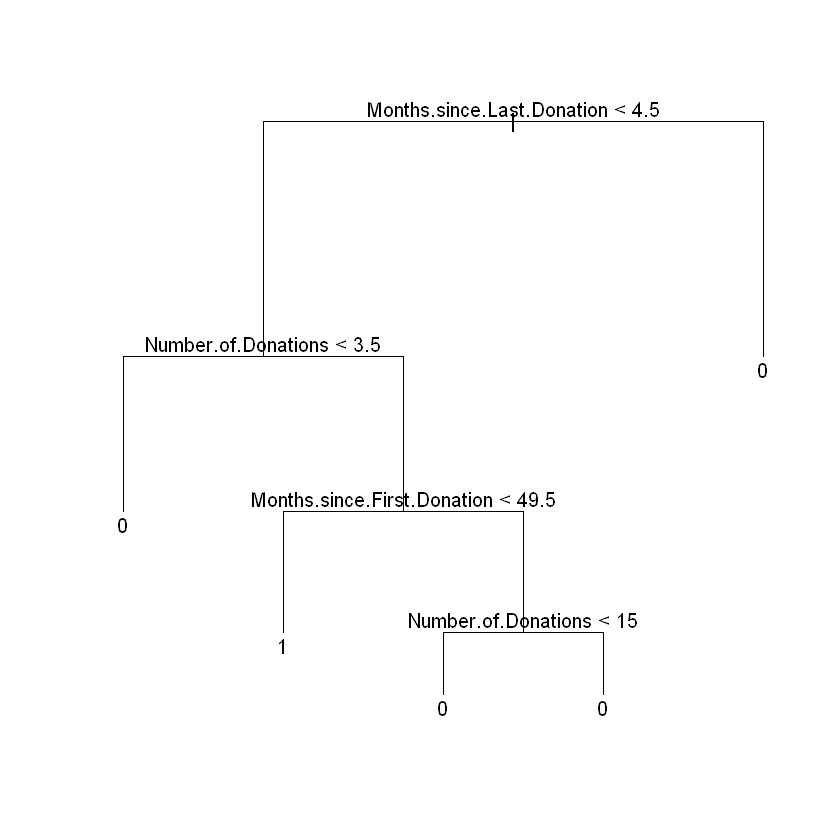

In [14]:
plot(model)
text(model)

In [15]:
# Predict the test data based on the model
pred = predict(model, test, type = "class")

In [16]:
# Confusion Matrix
cm = table(test$target, pred)
cm

   pred
      0   1
  0 116  20
  1  26  22

In [17]:
accuracy = sum(diag(cm))/sum(cm)
print(paste("Accuracy = ", accuracy*100))

[1] "Accuracy =  75"


## 3. Mobile Price Dataset

In [19]:
library(randomForest) 

In [20]:
df = read.csv("mobile_train.csv")
head(df)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,⋯,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1928,0,2.6,0,5,0,5,0.8,162,5,⋯,229,1004,696,14,12,15,1,1,1,0
2,1101,0,1.8,0,0,0,31,0.2,148,2,⋯,387,1269,2196,12,6,19,0,1,1,1
3,1975,1,1.9,1,2,0,31,0.9,151,1,⋯,775,1607,3022,13,5,19,0,0,1,3
4,742,1,2.3,0,0,0,21,0.7,104,8,⋯,875,925,331,11,8,7,1,0,0,0
5,1027,1,0.8,0,7,0,18,1.0,146,7,⋯,338,534,1234,7,4,14,1,0,1,0
6,676,0,2.2,0,1,1,39,0.2,84,1,⋯,864,1011,2064,13,7,6,1,0,0,1


In [21]:
str(df)

'data.frame':	1600 obs. of  21 variables:
 $ battery_power: int  1928 1101 1975 742 1027 676 713 1236 1410 1322 ...
 $ blue         : int  0 0 1 1 1 0 0 1 1 0 ...
 $ clock_speed  : num  2.6 1.8 1.9 2.3 0.8 2.2 1.6 2.8 0.5 1.7 ...
 $ dual_sim     : int  0 0 1 0 0 0 0 0 1 1 ...
 $ fc           : int  5 0 2 0 7 1 4 6 0 6 ...
 $ four_g       : int  0 0 0 0 0 1 1 1 1 0 ...
 $ int_memory   : int  5 31 31 21 18 39 63 32 15 7 ...
 $ m_dep        : num  0.8 0.2 0.9 0.7 1 0.2 0.7 0.3 0.3 0.8 ...
 $ mobile_wt    : int  162 148 151 104 146 84 89 143 92 140 ...
 $ n_cores      : int  5 2 1 8 7 1 2 4 3 3 ...
 $ pc           : int  16 7 17 1 11 5 8 18 1 9 ...
 $ px_height    : int  229 387 775 875 338 864 103 492 192 177 ...
 $ px_width     : int  1004 1269 1607 925 534 1011 1760 1403 1311 1990 ...
 $ ram          : int  696 2196 3022 331 1234 2064 2082 942 2304 1418 ...
 $ sc_h         : int  14 12 13 11 7 13 15 16 18 19 ...
 $ sc_w         : int  12 6 5 8 4 7 10 12 4 17 ...
 $ talk_time    : int  1

In [24]:
# convert to factors
factors_index = c(2,4,6,18,19,20,21)
for (i in factors_index) {
    col_name = names(df)[i]
    df[, col_name] = sapply(df[, col_name], factor)
}

In [25]:
str(df)

'data.frame':	1600 obs. of  21 variables:
 $ battery_power: int  1928 1101 1975 742 1027 676 713 1236 1410 1322 ...
 $ blue         : Factor w/ 2 levels "0","1": 1 1 2 2 2 1 1 2 2 1 ...
 $ clock_speed  : num  2.6 1.8 1.9 2.3 0.8 2.2 1.6 2.8 0.5 1.7 ...
 $ dual_sim     : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 2 2 ...
 $ fc           : int  5 0 2 0 7 1 4 6 0 6 ...
 $ four_g       : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 2 2 1 ...
 $ int_memory   : int  5 31 31 21 18 39 63 32 15 7 ...
 $ m_dep        : num  0.8 0.2 0.9 0.7 1 0.2 0.7 0.3 0.3 0.8 ...
 $ mobile_wt    : int  162 148 151 104 146 84 89 143 92 140 ...
 $ n_cores      : int  5 2 1 8 7 1 2 4 3 3 ...
 $ pc           : int  16 7 17 1 11 5 8 18 1 9 ...
 $ px_height    : int  229 387 775 875 338 864 103 492 192 177 ...
 $ px_width     : int  1004 1269 1607 925 534 1011 1760 1403 1311 1990 ...
 $ ram          : int  696 2196 3022 331 1234 2064 2082 942 2304 1418 ...
 $ sc_h         : int  14 12 13 11 7 13 15 16 18 19 ...
 $ sc_

In [26]:
levels(df$price_range)

[1] "0" "1" "3" "2"

In [27]:
split = sample.split(df, SplitRatio=0.75)   # 75% for training set and 25% for test set

In [28]:
train = subset(df, split==T)
test = subset(df, split==F)

In [29]:
# Random Forest model : 
model = randomForest(price_range~. , data=train, ntree=100, mtry=5)

In [30]:
summary(model)

                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted       1143   factor numeric  
err.rate         500   -none- numeric  
confusion         20   -none- numeric  
votes           4572   matrix numeric  
oob.times       1143   -none- numeric  
classes            4   -none- character
importance        20   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            14   -none- list     
y               1143   factor numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

ERROR: Error in xy.coords(x, y, recycle = TRUE, setLab = FALSE): 'x' is a list, but does not have components 'x' and 'y'


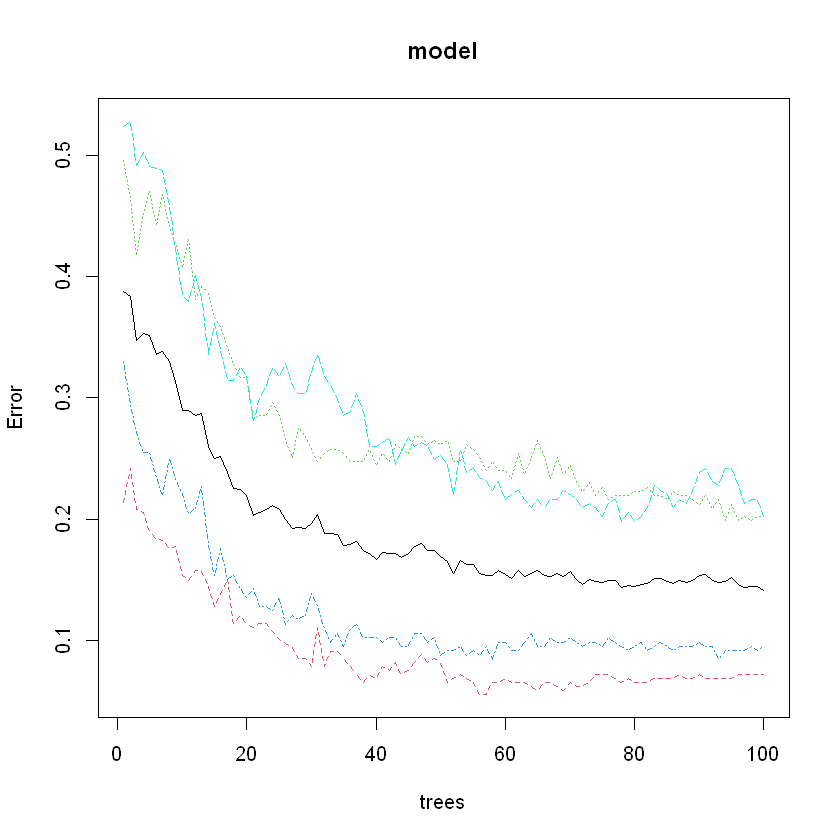

In [31]:
plot(model)
text(model)

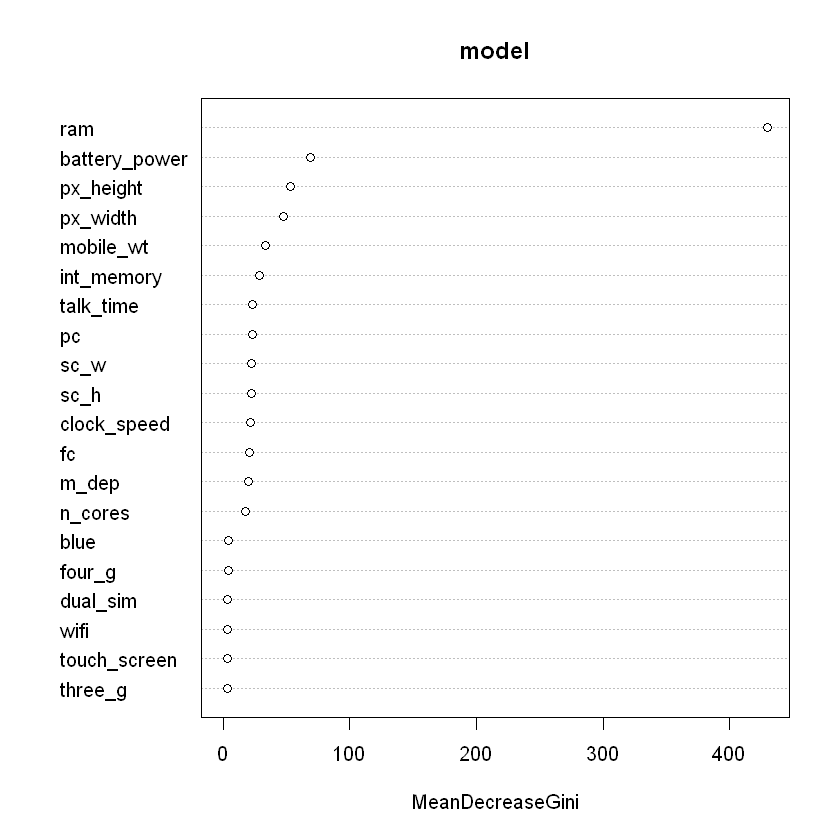

In [32]:
varImpPlot(model)

In [33]:
# Predict the test data based on the model
prediction = predict(model, test, type="class")

In [34]:
# Confusion Matrix
cm = table(test$price_range, prediction)
cm

   prediction
      0   1   3   2
  0  89   5   0   0
  1   9  96   0   8
  3   0   0 116  11
  2   0  15   8 100

In [35]:
accuracy = sum(diag(cm))/sum(cm)
print(paste("Accuracy = ", accuracy*100))

[1] "Accuracy =  87.746170678337"


 --- 
 Archana S  <br/>
 +91-9566735320  <br/>
 its4archana@gmail.com  <br/>